# Multi-scale template matching with image loop to find best match
### (scale-invariance and rotation-invariance addressed)

Populating the interactive namespace from numpy and matplotlib


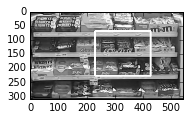

C:\Users\Owner\Desktop\Python\AdvPredModeling\Project\snickers\snickers_23.jpg


In [39]:
#set directory variable to folder where pics of snickers are stored
directory = 'C:\Users\Owner\Desktop\Python\AdvPredModeling\Project\snickers'
import os
import imutils
import cv2
import numpy as np
from matplotlib import pyplot as plt
%pylab inline
img = cv2.imread('rack33.png',0)
#does image denoising, doesn't seem to help much
img = cv2.fastNlMeansDenoising(img,None,10,21,7) 

found = None

#loop through files in directory, get filepath, and set template to be an img on each iteration
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        filepath = os.path.join(directory, filename)
        
        #now do template matching with each pic
        template = cv2.imread(filepath, 0)
        w, h = template.shape[::-1]
        for scale in np.linspace(0.2, 1.0, 20)[::-1]:
            # resize the image according to the scale, and keep track
            # of the ratio of the resizing
            resized = imutils.resize(img, width = int(img.shape[1] * scale))
            #ratio of old image to new
            r = img.shape[1] / float(resized.shape[1])
            # if the resized image is smaller than the template, then break
            #from the loop
            if resized.shape[0] < h or resized.shape[1] < w:
                break
        
            # detect edges in the resized, grayscale image and apply template
            # matching to find the template in the image
            #edged = cv2.Canny(resized, 50, 200)
            result = cv2.matchTemplate(img, template, cv2.TM_CCOEFF)
            (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)
 
            # draw a bounding box around the detected region
           # clone = np.dstack([edged, edged, edged])
            cv2.rectangle(result, (maxLoc[0], maxLoc[1]),
            (maxLoc[0] + w, maxLoc[1] + h), (0, 0, 255), 2)
    
            if found is None or maxVal > found[0]:
                found = (maxVal, maxLoc, r) 
                used_pic = filepath

# unpack the bookkeeping varaible and compute the (x, y) coordinates
# of the bounding box based on the resized ratio
(_, maxLoc, r) = found
(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
(endX, endY) = (int((maxLoc[0] + w) * r), int((maxLoc[1] + h) * r))
 
# draw a bounding box around the detected result and display the image
cv2.rectangle(img, (startX, startY), (endX, endY), (255, 0, 0), 5)
            
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.show()

print used_pic
    

# Multi-scale template matching
### (only scale-invariance addressed)

Populating the interactive namespace from numpy and matplotlib


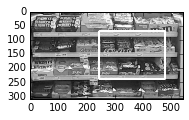

In [60]:
import imutils
import cv2
import numpy as np
from matplotlib import pyplot as plt
%pylab inline
template = cv2.imread('snickers.jpg',0)
img = cv2.imread('rack33.png',0)
w, h = template.shape[::-1]
found = None

for scale in np.linspace(0.2, 1.0, 20)[::-1]:
# resize the image according to the scale, and keep track
# of the ratio of the resizing
    resized = imutils.resize(img, width = int(img.shape[1] * scale))
    #ratio of old image to new
    r = img.shape[1] / float(resized.shape[1])
    # if the resized image is smaller than the template, then break
    #from the loop
    if resized.shape[0] < h or resized.shape[1] < w:
        break
        
    # detect edges in the resized, grayscale image and apply template
    # matching to find the template in the image
    #edged = cv2.Canny(resized, 50, 200)
    result = cv2.matchTemplate(img, template, cv2.TM_CCOEFF)
    (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)
 
    # draw a bounding box around the detected region
    #clone = np.dstack([edged, edged, edged])
    cv2.rectangle(result, (maxLoc[0], maxLoc[1]),
    (maxLoc[0] + w, maxLoc[1] + h), (0, 0, 255), 2)
    
    if found is None or maxVal > found[0]:
        found = (maxVal, maxLoc, r)
        
# unpack the bookkeeping varaible and compute the (x, y) coordinates
# of the bounding box based on the resized ratio
(_, maxLoc, r) = found
(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
(endX, endY) = (int((maxLoc[0] + w) * r), int((maxLoc[1] + h) * r))
 
# draw a bounding box around the detected result and display the image
cv2.rectangle(img, (startX, startY), (endX, endY), (255, 0, 0), 5)
            
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.show()



## Initial Template matching without addressing scale-invariance and rotation-invariance issues

Populating the interactive namespace from numpy and matplotlib


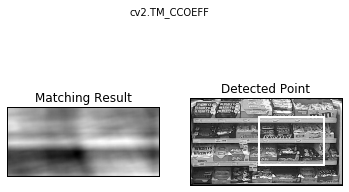

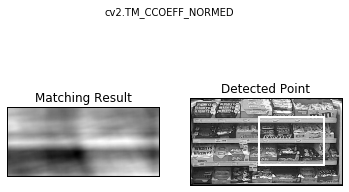

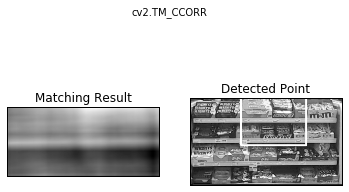

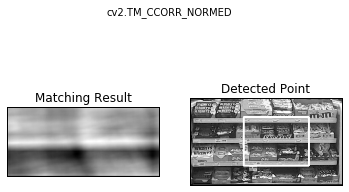

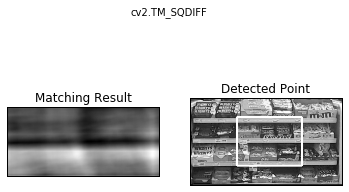

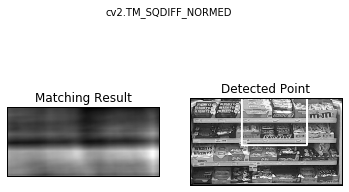

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%pylab inline
img = cv2.imread('rack33.png',0)
img2 = img.copy()
template = cv2.imread('snickers.jpg',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 500, 5)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

# EDGES

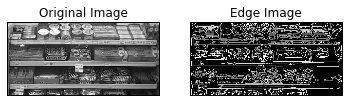

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('rackimages.jpeg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

## Initial Template Matching with Edges

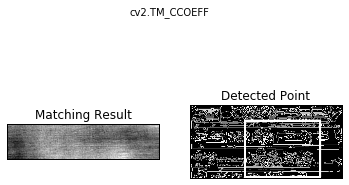

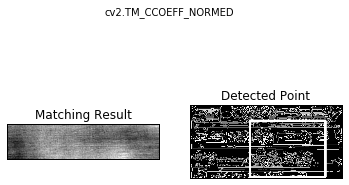

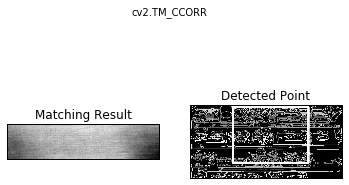

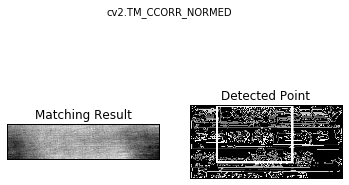

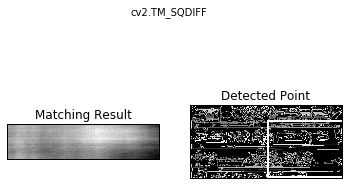

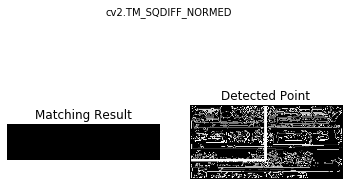

In [21]:
img = cv2.imread('rackimages.jpeg',0)
#edges
img = cv2.Canny(img,100,200)
img2 = img.copy()
template = cv2.imread('snickers.jpg',0)
#edges
template = cv2.Canny(template,100,200)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 500, 5)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

# Preproccessing

## Image Denoising

Populating the interactive namespace from numpy and matplotlib


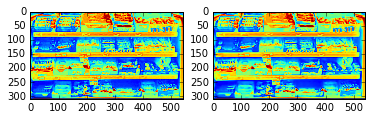

In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%pylab inline
img = cv2.imread('rack33.png',0)
dst = cv2.fastNlMeansDenoising(img,None,10,21,7) 

plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()

# Feature Matching

Populating the interactive namespace from numpy and matplotlib


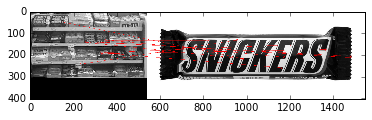

(<matplotlib.image.AxesImage at 0x9d81b00>, None)

In [12]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%pylab inline
#read in files
img1 = cv2.imread('rack33.png',0)          # queryImage
img2 = cv2.imread('snicker_bar.png',0) # trainImage

#denoise
#img1 = cv2.fastNlMeansDenoising(img1,None,10,21,7) 
#img2 = cv2.fastNlMeansDenoising(img2,None,10,21,7) 

#edges
#img1 = cv2.Canny(img1,100,200)
#img2 = cv2.Canny(img2,100,200)

# Initiate SIFT detector
orb = cv2.ORB()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)


# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)


# Draw first 10 matches.
img3 = drawMatches(img1,kp1,img2,kp2,matches[:10])

plt.imshow(img3),plt.show()

### Function used to draw matches since native OpenCV function not interfacing with python

In [7]:
def drawMatches(img1, kp1, img2, kp2, matches):
    """
    My own implementation of cv2.drawMatches as OpenCV 2.4.9
    does not have this function available but it's supported in
    OpenCV 3.0.0

    This function takes in two images with their associated 
    keypoints, as well as a list of DMatch data structure (matches) 
    that contains which keypoints matched in which images.

    An image will be produced where a montage is shown with
    the first image followed by the second image beside it.

    Keypoints are delineated with circles, while lines are connected
    between matching keypoints.

    img1,img2 - Grayscale images
    kp1,kp2 - Detected list of keypoints through any of the OpenCV keypoint 
              detection algorithms
    matches - A list of matches of corresponding keypoints through any
              OpenCV keypoint matching algorithm
    """

    # Create a new output image that concatenates the two images together
    # (a.k.a) a montage
    rows1 = img1.shape[0]
    cols1 = img1.shape[1]
    rows2 = img2.shape[0]
    cols2 = img2.shape[1]

    out = np.zeros((max([rows1,rows2]),cols1+cols2,3), dtype='uint8')

    # Place the first image to the left
    out[:rows1,:cols1] = np.dstack([img1, img1, img1])

    # Place the next image to the right of it
    out[:rows2,cols1:] = np.dstack([img2, img2, img2])

    # For each pair of points we have between both images
    # draw circles, then connect a line between them
    for mat in matches:

        # Get the matching keypoints for each of the images
        img1_idx = mat.queryIdx
        img2_idx = mat.trainIdx

        # x - columns
        # y - rows
        (x1,y1) = kp1[img1_idx].pt
        (x2,y2) = kp2[img2_idx].pt

        # Draw a small circle at both co-ordinates
        # radius 4
        # colour blue
        # thickness = 1
        cv2.circle(out, (int(x1),int(y1)), 4, (255, 0, 0), 1)   
        cv2.circle(out, (int(x2)+cols1,int(y2)), 4, (255, 0, 0), 1)

        # Draw a line in between the two points
        # thickness = 1
        # colour blue
        cv2.line(out, (int(x1),int(y1)), (int(x2)+cols1,int(y2)), (255, 0, 0), 1)


    # Show the image
    cv2.imshow('Matched Features', out)
    cv2.waitKey(0)
    cv2.destroyWindow('Matched Features')

    # Also return the image if you'd like a copy
    return out

#### Attempt to use homography to find object in image after feature matching

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%pylab inline
#read in files
img1 = cv2.imread('rack33.png',0)          # queryImage
img2 = cv2.imread('snicker_bar.png',0) # trainImage

#denoise
#img1 = cv2.fastNlMeansDenoising(img1,None,10,21,7) 
#img2 = cv2.fastNlMeansDenoising(img2,None,10,21,7) 

#edges
#img1 = cv2.Canny(img1,100,200)
#img2 = cv2.Canny(img2,100,200)

import numpy as np
import cv2
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 4

# Initiate SIFT detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params= dict(algorithm = FLANN_INDEX_LSH, 
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print "Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT)
    matchesMask = None
    
    
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
#img3 = drawMatches(img1, kp1, img2, kp2, matches)

plt.imshow(img3, 'gray'),plt.show()    

Populating the interactive namespace from numpy and matplotlib


error: C:\builds\master_PackSlaveAddon-win64-vc12-static\opencv\modules\python\src2\cv2.cpp:163: error: (-215) The data should normally be NULL! in function NumpyAllocator::allocate


#### Attempts at different algorithm for homography after feature matching

In [ ]:
MIN_MATCH_COUNT = 4

def kaze_match(im1_path, im2_path):
    # load the image and convert it to grayscale
    im1 = cv2.imread(im1_path)
    im2 = cv2.imread(im2_path)
    gray1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)    

    # initialize the AKAZE descriptor, then detect keypoints and extract
    # local invariant descriptors from the image
    detector = cv2.AKAZE_create()
    (kps1, descs1) = detector.detectAndCompute(gray1, None)
    (kps2, descs2) = detector.detectAndCompute(gray2, None)

    print("keypoints: {}, descriptors: {}".format(len(kps1), descs1.shape))
    print("keypoints: {}, descriptors: {}".format(len(kps2), descs2.shape))    

    # Match the features
    bf = cv2.BFMatcher(cv2.NORM_HAMMING)
    matches = bf.knnMatch(descs1,descs1, k=2)
    


    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append([m])
            
    print m
    #img3 = cv2.drawMatches(im1,kp1,im2,kp2,good,None,**draw_params)
        

    # cv2.drawMatchesKnn expects list of lists as matches.
    im3 = cv2.drawMatchesKnn(im1, kps1, im2, kps2, good[1:20], None, flags=2)
    cv2.imshow("AKAZE matching", im3)
    cv2.waitKey(0)
    
kaze_match('rack33.png', 'hersheys.jpg')

keypoints: 1120, descriptors: (1120L, 61L)
keypoints: 194, descriptors: (194L, 61L)
<DMatch 00000000073F6EB0>
